In [17]:
import pandas as pd
import plotly.express as px
import numpy as np

In [7]:
df = pd.read_csv('datos_taxonomiaCompleta2.csv')

In [8]:
df['Class'].unique()

array(['Abiotrophia', 'Acidovorax', 'Cyanibacteria', 'Megasphaera',
       'Mycobacterium', 'Neisseria', 'Prevotella', 'Streptococcus',
       'Veillonella'], dtype=object)

In [12]:
cont=df['Class'].value_counts()
cont

Class
Prevotella       9999
Streptococcus    9969
Mycobacterium    9921
Veillonella      4942
Acidovorax       4195
Neisseria        4175
Megasphaera       857
Abiotrophia       471
Cyanibacteria      68
Name: count, dtype: int64

In [19]:
temp, temp1=np.unique(df['Class'], return_counts=True)
temp, temp1

(array(['Abiotrophia', 'Acidovorax', 'Cyanibacteria', 'Megasphaera',
        'Mycobacterium', 'Neisseria', 'Prevotella', 'Streptococcus',
        'Veillonella'], dtype=object),
 array([ 471, 4195,   68,  857, 9921, 4175, 9999, 9969, 4942]))

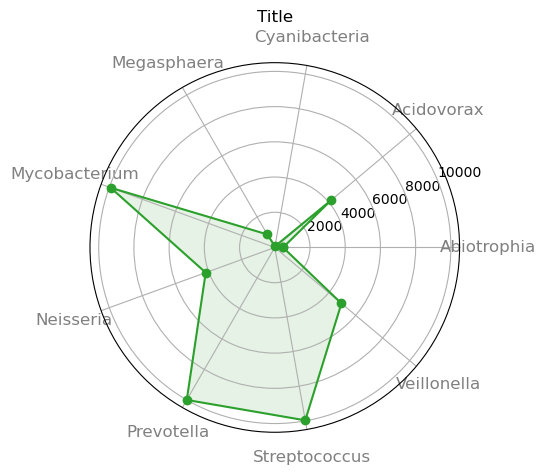

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_temp = pd.DataFrame({'Col A': temp,
                   'Col B': temp1})
fig = plt.figure()
ax = fig.add_subplot(111, projection="polar")

# theta has 5 different angles, and the first one repeated
theta = np.arange(len(df_temp) + 1) / float(len(df_temp)) * 2 * np.pi
# values has the 5 values from 'Col B', with the first element repeated
values =df_temp['Col B'].values
values = np.append(values, values[0])

# draw the polygon and the mark the points for each angle/value combination
l1, = ax.plot(theta, values, color="C2", marker="o", label="Name of Col B")
plt.xticks(theta[:-1], df_temp['Col A'], color='grey', size=12)
ax.tick_params(pad=10) # to increase the distance of the labels to the plot
# fill the area of the polygon with green and some transparency
ax.fill(theta, values, 'green', alpha=0.1)

# plt.legend() # shows the legend, using the label of the line plot (useful when there is more than 1 polygon)
plt.title("Title")
plt.show()

In [23]:
import pandas as pd
import plotly.graph_objects as go

df_temp = pd.DataFrame({'Col A': ['Abiotrophia', 'Cyanibacteria', 'Megasphaera',
                                  'Mycobacterium', 'Neisseria', 'Prevotella', 'Acidovorax', 'Streptococcus',
                                  'Veillonella'],
                        'Col B': [471, 68, 857, 9921, 4175, 9999, 419, 9969, 4942]})

fig = go.Figure()

# Duplicate the first data point at the end for closed line
r_values = df_temp['Col B'].tolist() + [df_temp['Col B'][0]]
theta_values = df_temp['Col A'].tolist() + [df_temp['Col A'][0]]

fig.add_trace(go.Scatterpolar(
    r=r_values,
    theta=theta_values,
    fill='toself',
    marker=dict(color='green'),
    name='Cantidad'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(df_temp['Col B'])]  # Ajusta el rango según tus datos
        ),
    ),
    showlegend=True,
    title="Cantidad de bactereias en el data frame"
)

fig.show()
